# How to use bt.Signal

Basically similar to strategies but less fun and customizable. Still a fast way to check a performance

In [1]:
import backtrader as bt
import pandas as pd

In [2]:
data = pd.read_csv("/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/Bybit_ETH_for_backtesting_IV.csv", parse_dates=True, index_col="datetime")
# Ensure the 'startTime' column is set as the index and convert column names to lowercase
# Define the custom data feed class
class PandasData(bt.feeds.PandasData):
    # Add a 'volume', 'openInterest', and 'turnover' lines to the inherited ones from the base class
    lines = ('volume', 'openinterest', 'turnover')
    
    # Define parameters for the column names
    params = (
        ('datetime', None),
        ('open', 'openPrice'),
        ('high', 'highPrice'),
        ('low', 'lowPrice'),
        ('close', 'closePrice'),
        ('volume', 'volume'),
        ('openinterest', 'openInterest'),
        ('turnover', 'turnover'),
    )

# Create an instance of the custom data feed
data_feed_1 = PandasData(dataname=data)

In [3]:
class SmaSignal(bt.Signal):

    params = (('period', 20), ) 
    def __init__(self): 
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)
    
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data_feed_1)
cerebro.broker.setcash(4000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}') 
cerebro.run() 
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')

Starting Portfolio Value: 4000.00
Final Portfolio Value: 4950.85


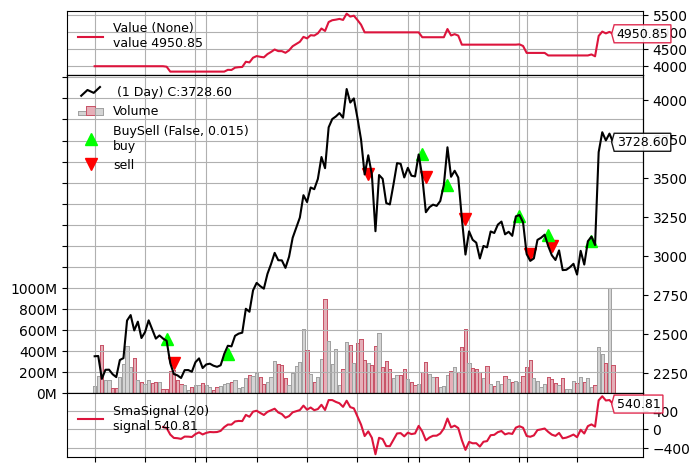

In [9]:
from matplotlib.dates import AutoDateLocator, DateFormatter
import matplotlib.pyplot as plt

%matplotlib inline
fig = cerebro.plot(iplot=False)[0][0]

# Customize the x-axis date format
locator = AutoDateLocator()
formatter = DateFormatter('%Y-%m-%d')
ax = fig.get_axes()[0]  # Get the first (and only) axis
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
fig.autofmt_xdate()

plot_path = "/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/some_plots/eth_Signal.png"  # Replace with your desired folder path
fig.savefig(plot_path, bbox_inches='tight')

plt.show()